In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt

## Implementation
Code can be ran through this notebook or on the command line. 
If running through the command line, remember to create the build and data directories.

In [2]:
import os

build = 'build'

# check if build directory exists
isbuild = os.path.isdir(build)

# if build directory does not exist, make the directory
if isbuild == False:
    cwd = os.getcwd()
    print('build directory not found.'+'\n'+'making directory... '+str(cwd)+'\\'+build)
    os.mkdir(build)
else:
    print(build+' directory exists.')
    

datstr = 'data'

# check if data directory exists
isdata = os.path.isdir(datstr)

# if data directory does not exist, make the directory
if isdata == False:
    cwd = os.getcwd()
    print('data directory not found.'+'\n'+'making directory... '+str(cwd)+'\\'+datstr)
    os.mkdir(datstr)
else:
    print(datstr+' directory exists.')

build directory exists.
data directory exists.


In [403]:
%%bash
cd build
cmake ..



-- CPM: adding package googletest@1.10.0 (release-1.10.0)
-- Configuring done
-- Generating done
-- Build files have been written to: /mnt/c/Users/brian/hpc21/project-2-brianna-dom/build


In [ ]:
%%bash
cd build
make

mpirun -n 1 hsolv


## Plotting Results
Please make sure the functions are compiled in 'Plot Functions' (below) before running this section

In [250]:
# location of data
floc   = datstr


#### I. Orbital diagrams
To plot axis (c1, c2): x = 0, y = 1, z = 2

saving to png... data/PLT_ORBITAL_DAT_P100_00020000.png
saving to png... data/PLT_ORBITAL_DAT_P200_00020000.png
saving to png... data/PLT_ORBITAL_DAT_P210_00020000.png
saving to png... data/PLT_ORBITAL_DAT_P300_00020000.png
saving to png... data/PLT_ORBITAL_DAT_P310_00020000.png
saving to png... data/PLT_ORBITAL_DAT_P320_00020000.png
saving to png... data/PLT_ORBITAL_DAT_P400_00020000.png
saving to png... data/PLT_ORBITAL_DAT_P410_00020000.png
saving to png... data/PLT_ORBITAL_DAT_P420_00020000.png
saving to png... data/PLT_ORBITAL_DAT_P430_00020000.png


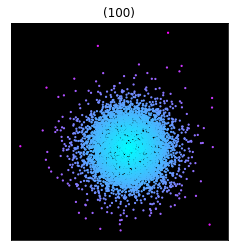

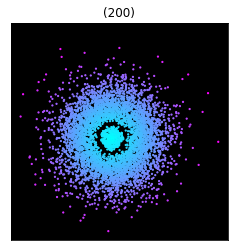

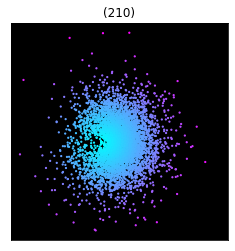

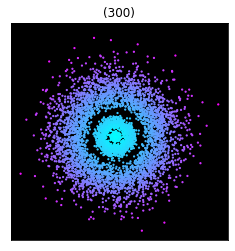

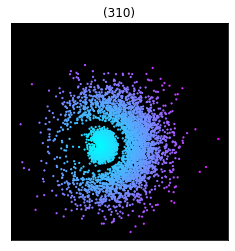

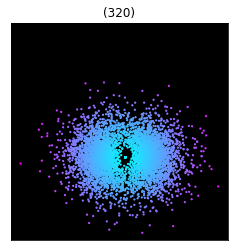

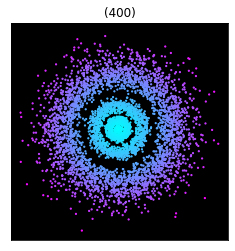

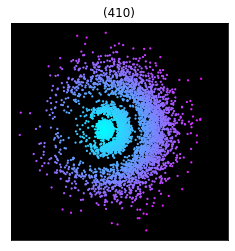

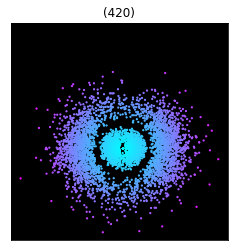

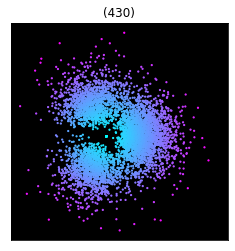

In [261]:
N = 5
npts = 20000
for nx in range(1,N):
    for lx in range (0, nx):
        
        orbitals_xy(floc, nx, lx, 0, npts, 0, 1, axis=False)


#### II. Radial probability plot

opening data/DAT_P100_00020000.txt...
saving to png... data/PLT_PSI_DAT_P100_00020000.png


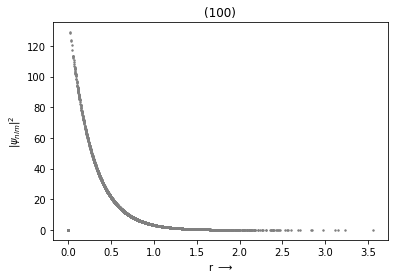

In [260]:
prob_plt(floc, 1, 0, 0, npts)

### Plot Functions

In [295]:
'''
Radial Probability plot

'''
def prob_plt(floc, n, l, m, pts):
     # get file name
    fname = get_fname(n, l, m, pts)
    fl = floc+'/'+fname+'.txt'
    
    print('opening '+fl+'...')
    
    # pull data
    p = np.loadtxt(fl, skiprows=2, usecols=0)
    r = np.loadtxt(fl, skiprows=2, usecols=1)
    
    # plot data
    plt.scatter(r,p, s=2, c = 'gray')
    
    plt.title('('+str(n)+str(l)+str(m)+')')
    plt.xlabel('r $\longrightarrow$')
    plt.ylabel('$|\psi_{nlm}|^2$')
    # plt.xlim([0, 10])
    
    # save image to file
    pltstr = floc+'/'+"PLT_PSI_"+fname+'.png'
    plt.savefig(pltstr, format='png', dpi=800)
    
    print('saving to png... '+pltstr)

In [296]:
'''
Orbital Plotter

to plot axis (c1, c2):
x = 0
y = 1
z = 2

'''
def orbitals_xy(floc, n, l, m, pts, c1, c2, axis = True):
    
    coords = ['$x$', '$y$', '$z$']
    
    # get file name
    fname = get_fname(n, l, m, pts)
    fl = floc+'/'+fname+'.txt'
    
    #print('opening '+fl+'...')
    
    # pull data
    r = np.loadtxt(fl, skiprows=2, usecols=1)
    x = np.loadtxt(fl, skiprows=2, usecols=c1+2)
    y = np.loadtxt(fl, skiprows=2, usecols=c2+2)
    
    # set up plot
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_facecolor((0, 0, 0))
    
    # plot data
    plt.scatter(x,y, s=1.5, c=r, cmap=plt.cm.cool)
    
    # constrain axis
    plt.axis('square')
    
    # plot attributes
    #plt.title('('+str(n)+str(l)+str(m)+')',y=-.25)
    plt.title('('+str(n)+str(l)+str(m)+')')
    plt.xlabel(coords[c1])
    plt.ylabel(coords[c2], rotation=0)
    
    if axis == False:
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
    
    # save image to file
    pltstr = floc+'/'+"PLT_ORBITAL_"+fname+'.png'
    plt.savefig(pltstr, format='png', dpi=800)
    
    print('saving to png... '+pltstr)


In [297]:
def get_fname(n, l, m, pts):
    
    # m-sign value
    # N for m < 0
    
    if m < 0:
        msign = 'N'
    else:
        msign = 'P'
        
    spts = str(pts)
    nlen = len(spts)
    clen = 8
    
    newstr = ''
    
    while nlen < clen:
        newstr = newstr+'0'
        nlen = nlen + 1
        
    newstr = newstr+spts
    
    nlm = str(n)+str(l)+str(m)
    fname = 'DAT_'+msign+nlm+'_'+newstr
    
    return fname